**Teoria de Circuitos II**

# **Trabajo Semanal 1**

**Gaston Cebreiro**

# TP1 Ejercicio 7


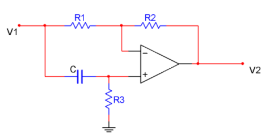

*Para el siguiente circuito conocido como Filtro Pasa Todo o Rotador de fase, se pide obtener la función transferencia V2/V1    (módulo , fase y diagrama de polos y ceros) si R2/R1= 1 y simular con R3=1kΩ ; C=1μF.*

# Resolucion

### Obtencion de la Trasnferencia:

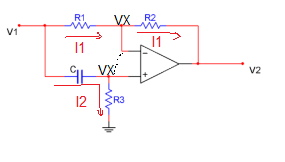

* Planteamos la corriente en R1 y R2:
                     

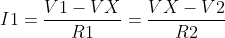

* Planteamos la corriente en C y R3:

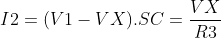

* Despejamos VX en funcion de V1 para remplazar en la primer ecuacion:

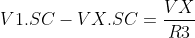

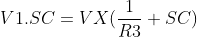

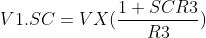

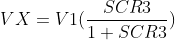

* Sabiendo que R1/R2=1 la ecuacion 1 nos queda:

* Remplazando VX en esta ecuacion:

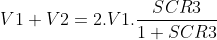

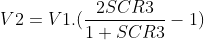

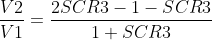

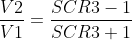

* Finalmente, sacando factor comun C.R3 para dejar la S sola queda:

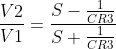

* Podemos ver que tenemos un cero en 1/CR3 y un polo en -1/CR3, ambos sobre el eje real 
* Sabiendo que C=1uF y R3=1kΩ nos queda:

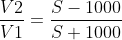

#### Normalizacion

* Podemos considerar una norma de frecuencia Ωw=1000 de manera que nos quede Sn=S/Ωw:

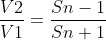

### Simulacion Matematica con Python:

In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
@author: Gaston Cebreiro
"""
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

# módulo de SciPy
from scipy import signal as sig

# un módulo adaptado a mis necesidades
from splane import bodePlot, pzmap
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})
#%%

#Selecciono los componentes

R3  = 1e3
C   = 1e-6 

findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.


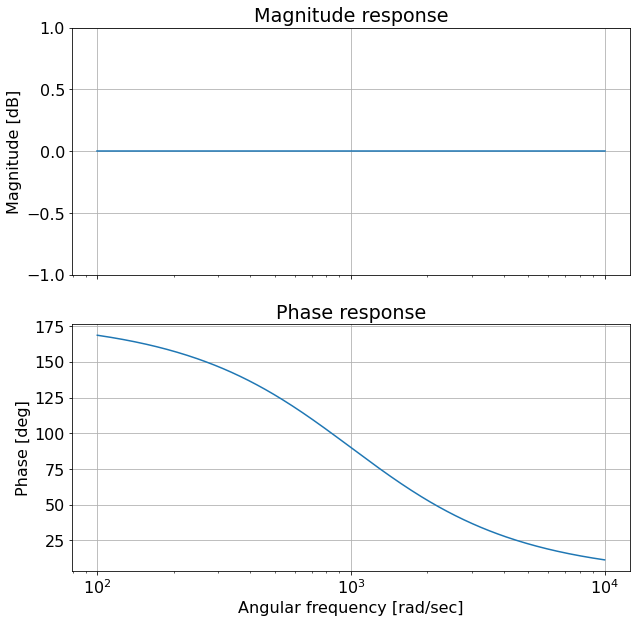

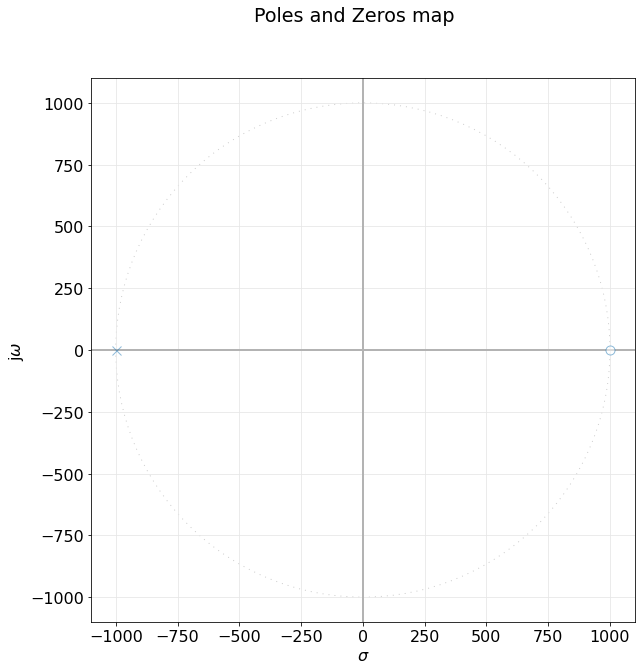

In [6]:
#%% Simulamos Fase, Modulo y Diagrama de polos y ceros
wc = - 1/(C*R3)
wp = 1/(C*R3)

num = np.array([ 1, wc ])
den = np.array([ 1, wp ])


H = sig.TransferFunction( num, den )
# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.
_, axes_hdl = bodePlot(H)

# para que se vea como uno intuye el módulo. Probar comentar las siguientes 2 líneas
plt.sca(axes_hdl[0])
plt.ylim([-1,1])



plt.gca

pzmap(H)

plt.show()


### Simulacion Matematica con Valores Normalizados en Frecuencia:

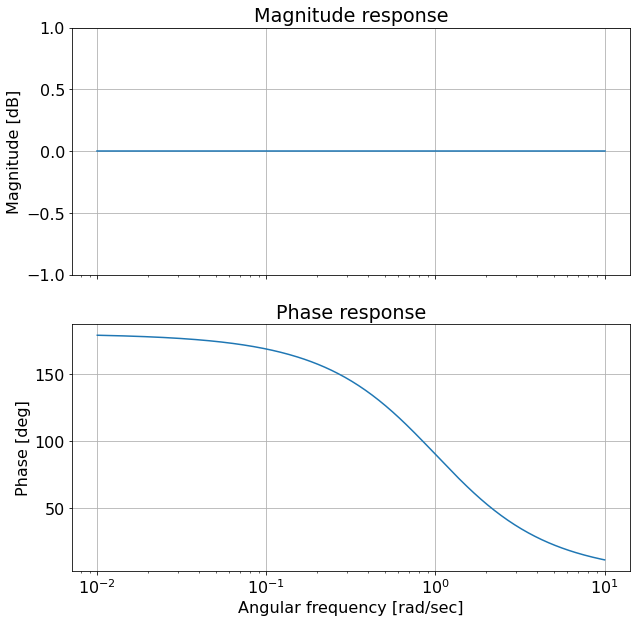

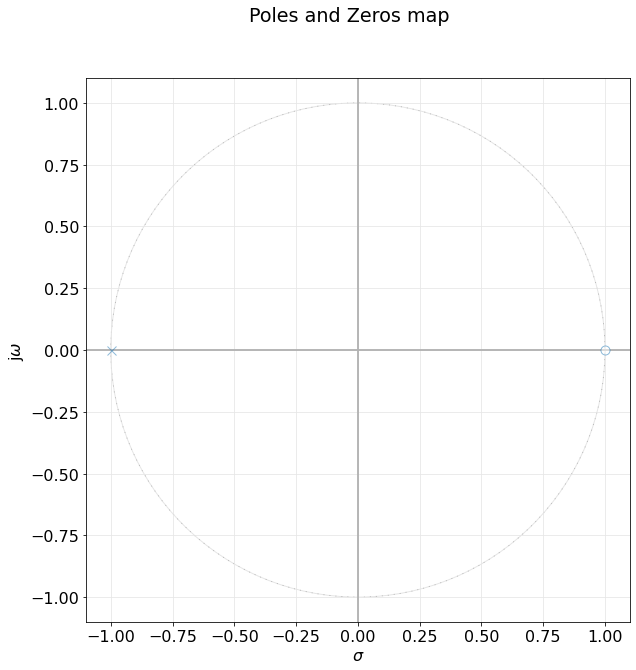

In [7]:
#%% Con valores normalizados en frecuencia
norma = 1e3   #Calculo norma = wo = 1000

wc_n = wc/norma
wp_n = wp/norma

num_n = np.array([ 1, wc_n ])
den_n = np.array([ 1, wp_n ])


Hn = sig.TransferFunction( num_n , den_n )
# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.
_, axes_hdl = bodePlot(Hn)

# para que se vea como uno intuye el módulo. Probar comentar las siguientes 2 líneas
plt.sca(axes_hdl[0])
plt.ylim([-1,1])

plt.gca

pzmap(Hn)

plt.show()

### Simulacion Circuital con LTSpice:

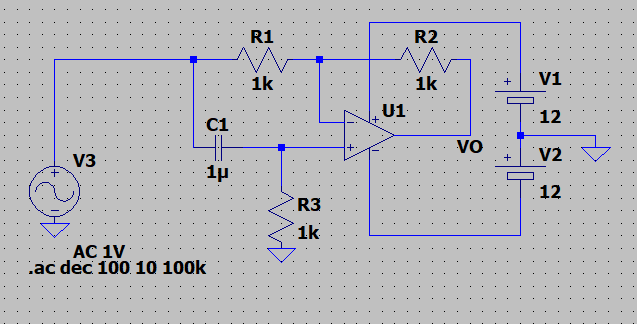

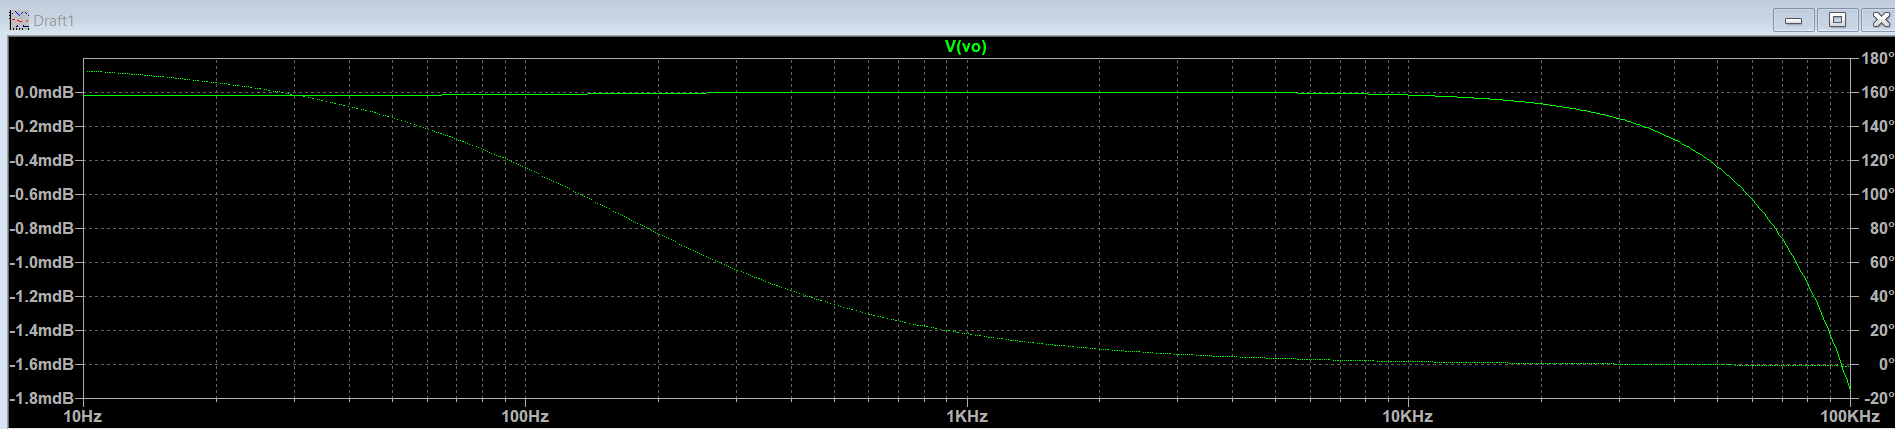

### **Conclusiones**

Como podemos ver tanto en la simulacion circuital como matematica, el circuito tiene un ganancia de 0dB aproximadamente, lo que significa una ganancia unitaria en veces. Esta ganancia se mantiene en un amplio espectro de frecuencias, lo cual nos permite entender por que el circuito se lo conoce como "PasaTodo". Tambien vale la pena aclarar que la Normalizacion en frecuencia no afecta a la respuesta del circuito como se puede ver en la segunda simulacion con python. Solo varia el eje de frecuencias en la fase, ya que hicimos una normalizacion diviendo por el wo=1000.

Adjunto la resolucion manual del ejercicio en este [link de github](https://github.com/GastonCebreiro/TC2/blob/main/Resolucion%20Manual%20TPS1.pdf)